<a href="https://colab.research.google.com/github/DaverArenas/DataAnalytics_Text/blob/main/An%C3%A1lisisReformaTributaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import os
import pandas as pd
from datetime import date

In [63]:
import nltk
from nltk.corpus import stopwords
import pandas as pd
import matplotlib.pyplot as plt
import collections
import csv
import numpy as np
import re
import snscrape.modules.twitter as sntwitter
import itertools
from datetime import date

## Extraer tweets REFORMA TRIBUTARIA CARRASQUILLA: "Ley de Solidaridad Sostenible"

In [14]:
import snscrape.modules.twitter as sntwitter
import itertools
import os
import pandas as pd
from datetime import date

In [45]:
topic='reforma tributaria'
from_date = '2021-03-01'
end_date = '2021-05-01'
search='@"{}" lang:es since:"{}" until:"{}"'.format(topic,from_date,end_date)

In [46]:
df_1 = pd.DataFrame(itertools.islice(sntwitter.TwitterSearchScraper(search).get_items(), 5000))
df_1

,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss
0,https://twitter.com/WNTERTHK/status/1388282013...,2021-04-30 23:59:59+00:00,@gcftintokio NO A LA REFORMA TRIBUTARIA\n#P010...,1388282013984051201,WNTERTHK,[],,[],
1,https://twitter.com/stillwghosts/status/138828...,2021-04-30 23:59:59+00:00,@JSOOGAG NO A LA REFORMA TRIBUTARIA\n#P010deEs...,1388282011815665665,stillwghosts,[],,[],
2,https://twitter.com/inamdimples/status/1388282...,2021-04-30 23:59:59+00:00,@illegirlxtae NO A LA REFORMA TRIBUTARIA\n#P01...,1388282011098533888,inamdimples,[],,[],
3,https://twitter.com/momofresitaa/status/138828...,2021-04-30 23:59:56+00:00,@roseismylove__ NO A LA REFORMA TRIBUTARIA\n#P...,1388281999509626882,momofresitaa,[],,[],
4,https://twitter.com/_minnieteamo/status/138828...,2021-04-30 23:59:54+00:00,@iSKZKOUSHI NO A LA REFORMA TRIBUTARIA\n\n#P01...,1388281989933981703,_minnieteamo,[],,[],
...,...,...,...,...,...,...,...,...,...
4995,https://twitter.com/Rvelasco1959/status/138816...,2021-04-30 16:01:07+00:00,@tways @PuertAna La reforma tributaria o como ...,1388161502306263053,Rvelasco1959,[],,[],
4996,https://twitter.com/94_nathia/status/138816148...,2021-04-30 16:01:03+00:00,En colombia nos están imponiendo una reforma t...,1388161484153360389,94_nathia,[],,[],
4997,https://twitter.com/AABenedetti/status/1388161...,2021-04-30 16:00:58+00:00,Militarizar ciudades enteras antes que retirar...,1388161465392279552,AABenedetti,[],,[],
4998,https://twitter.com/Jhoansalvarez/status/13881...,2021-04-30 16:00:53+00:00,Ahora después que nos quieren meter la reforma...,1388161443300888580,Jhoansalvarez,[],,[],


In [47]:
##Convertimos la fecha a la hora local
df_1.date = df_1.date.dt.tz_convert('America/Bogota')

In [48]:
df_1.head()

,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss
0,https://twitter.com/WNTERTHK/status/1388282013...,2021-04-30 18:59:59-05:00,@gcftintokio NO A LA REFORMA TRIBUTARIA\n#P010...,1388282013984051201,WNTERTHK,[],,[],
1,https://twitter.com/stillwghosts/status/138828...,2021-04-30 18:59:59-05:00,@JSOOGAG NO A LA REFORMA TRIBUTARIA\n#P010deEs...,1388282011815665665,stillwghosts,[],,[],
2,https://twitter.com/inamdimples/status/1388282...,2021-04-30 18:59:59-05:00,@illegirlxtae NO A LA REFORMA TRIBUTARIA\n#P01...,1388282011098533888,inamdimples,[],,[],
3,https://twitter.com/momofresitaa/status/138828...,2021-04-30 18:59:56-05:00,@roseismylove__ NO A LA REFORMA TRIBUTARIA\n#P...,1388281999509626882,momofresitaa,[],,[],
4,https://twitter.com/_minnieteamo/status/138828...,2021-04-30 18:59:54-05:00,@iSKZKOUSHI NO A LA REFORMA TRIBUTARIA\n\n#P01...,1388281989933981703,_minnieteamo,[],,[],


In [50]:
min(df_1.date)

Timestamp('2021-04-30 11:00:22-0500', tz='America/Bogota')

In [51]:
path='/content/drive/MyDrive/Datasets/'

In [52]:
df_1.to_csv(path+'SearchReforma_2021.csv', encoding='utf-8-sig')

##Cargar los datos de un CSV

In [53]:
df=pd.read_csv(path+'SearchReforma_2021.csv', encoding='utf-8-sig')

In [54]:
df.head(10)

,Unnamed: 0,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss
0,0,https://twitter.com/WNTERTHK/status/1388282013...,2021-04-30 18:59:59-05:00,@gcftintokio NO A LA REFORMA TRIBUTARIA\n#P010...,1388282013984051201,WNTERTHK,[],NaN,[],NaN
1,1,https://twitter.com/stillwghosts/status/138828...,2021-04-30 18:59:59-05:00,@JSOOGAG NO A LA REFORMA TRIBUTARIA\n#P010deEs...,1388282011815665665,stillwghosts,[],NaN,[],NaN
2,2,https://twitter.com/inamdimples/status/1388282...,2021-04-30 18:59:59-05:00,@illegirlxtae NO A LA REFORMA TRIBUTARIA\n#P01...,1388282011098533888,inamdimples,[],NaN,[],NaN
3,3,https://twitter.com/momofresitaa/status/138828...,2021-04-30 18:59:56-05:00,@roseismylove__ NO A LA REFORMA TRIBUTARIA\n#P...,1388281999509626882,momofresitaa,[],NaN,[],NaN
4,4,https://twitter.com/_minnieteamo/status/138828...,2021-04-30 18:59:54-05:00,@iSKZKOUSHI NO A LA REFORMA TRIBUTARIA\n\n#P01...,1388281989933981703,_minnieteamo,[],NaN,[],NaN
5,5,https://twitter.com/PaolaAndrea2991/status/138...,2021-04-30 18:59:53-05:00,Vamos que vamos 🇨🇴🔥💪💪💚No a la REFORMA TRIBUTAR...,1388281988147302403,PaolaAndrea2991,[],NaN,[],NaN
6,6,https://twitter.com/bluntjuls/status/138828198...,2021-04-30 18:59:52-05:00,@fuckmekhea NO A LA REFORMA TRIBUTARIA\n#P010d...,1388281982375825418,bluntjuls,[],NaN,[],NaN
7,7,https://twitter.com/paulatinaxs/status/1388281...,2021-04-30 18:59:52-05:00,NO A LA REFORMA TRIBUTARIA\n⚠️‼\n#P010deEspald...,1388281981641838594,paulatinaxs,[],NaN,[],NaN
8,8,https://twitter.com/mauroelizalde/status/13882...,2021-04-30 18:59:51-05:00,@AForeroM @ClaudiaLopez Es cierto los vandalos...,1388281980828196864,mauroelizalde,[],NaN,[],NaN
9,9,https://twitter.com/Tavo_burbano/status/138828...,2021-04-30 18:59:43-05:00,@CaliCivicaYA Tumbar la reforma tributaria y n...,1388281945763758092,Tavo_burbano,[],NaN,[],NaN


## WordCloud

In [55]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [56]:
df.content

0       @gcftintokio NO A LA REFORMA TRIBUTARIA\n#P010...
1       @JSOOGAG NO A LA REFORMA TRIBUTARIA\n#P010deEs...
2       @illegirlxtae NO A LA REFORMA TRIBUTARIA\n#P01...
3       @roseismylove__ NO A LA REFORMA TRIBUTARIA\n#P...
4       @iSKZKOUSHI NO A LA REFORMA TRIBUTARIA\n\n#P01...
                              ...                        
4995    @tways @PuertAna La reforma tributaria o como ...
4996    En colombia nos están imponiendo una reforma t...
4997    Militarizar ciudades enteras antes que retirar...
4998    Ahora después que nos quieren meter la reforma...
4999    @tenorifico @andreapechiche @yadimleon86 @Gust...
Name: content, Length: 5000, dtype: object

In [57]:
text = ' '.join(txt for txt in df.content)
len(text)

905775

(-0.5, 399.5, 199.5, -0.5)

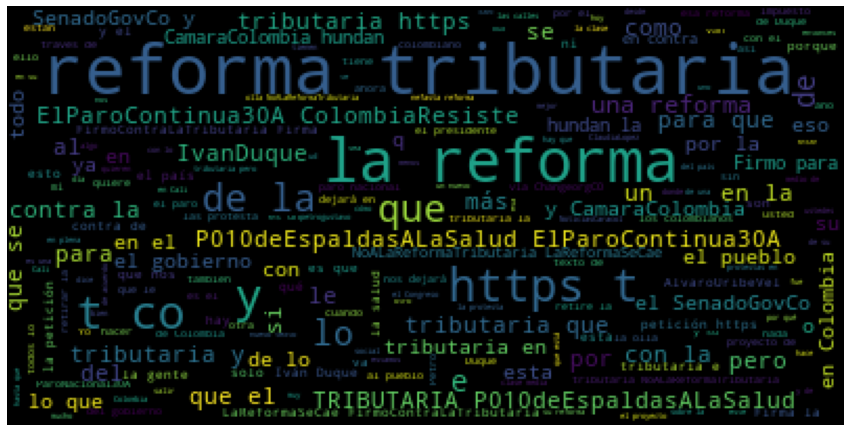

In [58]:
wordcloud = WordCloud().generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud) 
plt.axis("off")

##FRECUENCIA DE LAS PALABRAS

In [59]:
df_freq = pd.DataFrame.from_dict(data = wordcloud.words_, orient='index')
df_freq

,0
reforma tributaria,1.000000
la reforma,0.735692
https t,0.355922
t co,0.355922
y,0.342210
...,...
desde,0.012321
medio de,0.012321
hasta que,0.012122
petrogustavo,0.011924


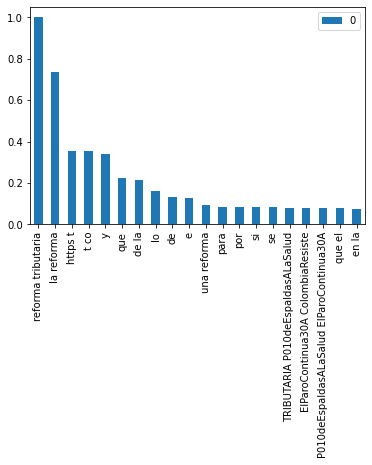

In [60]:
df_freq = df_freq.head(20)
df_freq.plot.bar()

##CONTANDO PALABRAS

In [61]:
words_in_tweet =text.lower().split()

In [64]:
counts_words = collections.Counter(words_in_tweet)
words_top=counts_words.most_common(10)
words, freqs = zip(*counts_words.most_common()[:10])
for w,q in zip(words, freqs):
  print(w,'\t',q)

la 	 7439
reforma 	 5298
de 	 5012
que 	 4424
a 	 3842
tributaria 	 3331
y 	 3296
el 	 3143
no 	 2944
en 	 2441


In [65]:
counts_words.most_common()

[('la', 7439),
 ('reforma', 5298),
 ('de', 5012),
 ('que', 4424),
 ('a', 3842),
 ('tributaria', 3331),
 ('y', 3296),
 ('el', 3143),
 ('no', 2944),
 ('en', 2441),
 ('los', 1613),
 ('es', 1552),
 ('se', 1339),
 ('para', 1185),
 ('por', 1155),
 ('con', 1058),
 ('del', 910),
 ('una', 898),
 ('las', 842),
 ('un', 801),
 ('al', 707),
 ('lo', 698),
 ('tributaria.', 664),
 ('contra', 654),
 ('tributaria,', 611),
 ('su', 560),
 ('si', 503),
 ('más', 498),
 ('le', 496),
 ('gobierno', 461),
 ('duque', 459),
 ('@ivanduque', 454),
 ('nos', 446),
 ('#colombiaresiste', 415),
 ('#elparocontinua30a', 410),
 ('#p010deespaldasalasalud', 407),
 ('pero', 392),
 ('como', 380),
 ('colombia', 362),
 ('pueblo', 358),
 ('está', 342),
 ('#noalareformatributaria', 330),
 ('este', 318),
 ('país', 288),
 ('o', 280),
 ('-', 270),
 ('presidente', 269),
 ('esta', 263),
 ('esa', 246),
 ('son', 239),
 ('@alvarouribevel', 237),
 ('hay', 233),
 ('va', 230),
 ('q', 230),
 ('paro', 225),
 ('todos', 217),
 ('ya', 211),
 ('@s

<BarContainer object of 10 artists>

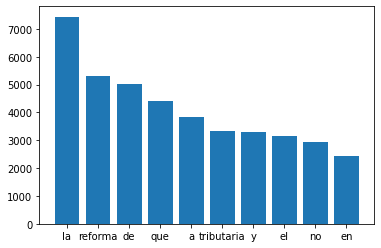

In [66]:
plt.bar(list(words), list(freqs))

In [67]:
df.head(5)

,Unnamed: 0,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss
0,0,https://twitter.com/WNTERTHK/status/1388282013...,2021-04-30 18:59:59-05:00,@gcftintokio NO A LA REFORMA TRIBUTARIA\n#P010...,1388282013984051201,WNTERTHK,[],NaN,[],NaN
1,1,https://twitter.com/stillwghosts/status/138828...,2021-04-30 18:59:59-05:00,@JSOOGAG NO A LA REFORMA TRIBUTARIA\n#P010deEs...,1388282011815665665,stillwghosts,[],NaN,[],NaN
2,2,https://twitter.com/inamdimples/status/1388282...,2021-04-30 18:59:59-05:00,@illegirlxtae NO A LA REFORMA TRIBUTARIA\n#P01...,1388282011098533888,inamdimples,[],NaN,[],NaN
3,3,https://twitter.com/momofresitaa/status/138828...,2021-04-30 18:59:56-05:00,@roseismylove__ NO A LA REFORMA TRIBUTARIA\n#P...,1388281999509626882,momofresitaa,[],NaN,[],NaN
4,4,https://twitter.com/_minnieteamo/status/138828...,2021-04-30 18:59:54-05:00,@iSKZKOUSHI NO A LA REFORMA TRIBUTARIA\n\n#P01...,1388281989933981703,_minnieteamo,[],NaN,[],NaN


In [68]:
##Creamos una nueva columna con las menciones que encontró en el tuiter o 'content' 
df['mentions'] = df['content'].apply(lambda x: re.findall('@\w+', x))

In [70]:
##Creamos una nueva columna con los hashtags que encontró en el tuiter o 'content' 
df['hashtag'] = df['content'].apply(lambda x: re.findall('#\w+', x))

In [71]:
df.head(5)

,Unnamed: 0,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss,mentions,hashtag
0,0,https://twitter.com/WNTERTHK/status/1388282013...,2021-04-30 18:59:59-05:00,@gcftintokio NO A LA REFORMA TRIBUTARIA\n#P010...,1388282013984051201,WNTERTHK,[],NaN,[],NaN,[@gcftintokio],"[#P010deEspaldasALaSalud, #ElParoContinua30A, ..."
1,1,https://twitter.com/stillwghosts/status/138828...,2021-04-30 18:59:59-05:00,@JSOOGAG NO A LA REFORMA TRIBUTARIA\n#P010deEs...,1388282011815665665,stillwghosts,[],NaN,[],NaN,[@JSOOGAG],"[#P010deEspaldasALaSalud, #ElParoContinua30A, ..."
2,2,https://twitter.com/inamdimples/status/1388282...,2021-04-30 18:59:59-05:00,@illegirlxtae NO A LA REFORMA TRIBUTARIA\n#P01...,1388282011098533888,inamdimples,[],NaN,[],NaN,[@illegirlxtae],"[#P010deEspaldasALaSalud, #ElParoContinua30A, ..."
3,3,https://twitter.com/momofresitaa/status/138828...,2021-04-30 18:59:56-05:00,@roseismylove__ NO A LA REFORMA TRIBUTARIA\n#P...,1388281999509626882,momofresitaa,[],NaN,[],NaN,[@roseismylove__],"[#P010deEspaldasALaSalud, #ElParoContinua30A, ..."
4,4,https://twitter.com/_minnieteamo/status/138828...,2021-04-30 18:59:54-05:00,@iSKZKOUSHI NO A LA REFORMA TRIBUTARIA\n\n#P01...,1388281989933981703,_minnieteamo,[],NaN,[],NaN,[@iSKZKOUSHI],"[#P010deEspaldasALaSalud, #ElParoContinua30A, ..."


In [72]:
screen_names = set(df.mentions.sum())
screen_names

{'@JulioRuedaGaspa',
 '@perico_pin_pin',
 '@AngelicaLozanoC',
 '@WFP',
 '@Adolfo_Morales_',
 '@alexdelosrios',
 '@luismorales0621',
 '@Villegasalejo',
 '@cuestion_p',
 '@ChangeItalia',
 '@CNNEE',
 '@Emol',
 '@alegoyes7',
 '@Henryjpume',
 '@elpais_america',
 '@SMC_EJERCITO',
 '@CasalinsGariza',
 '@GabrielaTD_',
 '@Clarajaz',
 '@HOMBREDEFE5',
 '@SoyNeutron',
 '@Jhonivanmb',
 '@JoseRodrigoToro',
 '@angellyflorez33',
 '@PoloDemocratico',
 '@seguridadmed',
 '@EltFund',
 '@charpolo',
 '@Almojabanax',
 '@JeffersonNTN24',
 '@gatorojo2806',
 '@fernandoposada_',
 '@laKuquiraspada',
 '@PinillaConcejal',
 '@PizarroMariaJo',
 '@FranciscoporBta',
 '@Tinojaramillo',
 '@las2orillas',
 '@Izashel',
 '@_AngieBurgos_',
 '@MAndreaNieto',
 '@JuanKarloslos',
 '@norapiedra69',
 '@hobsidee',
 '@RSilvaRomero',
 '@JavierLopezBel6',
 '@jualcamo',
 '@rcerdan',
 '@Teleantioquia',
 '@iF0REUPHORIA97',
 '@conalter',
 '@METROCALI',
 '@el_pais',
 '@cutcolombia',
 '@CutSantander',
 '@udistrital',
 '@ViafaraDaniel',
 '@Cl

In [73]:
tweets_names = pd.DataFrame()
for name in screen_names:
  tweets_names[name.replace('@', '')] = df.content.str.contains(name)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  This is separate from the ipykernel package so we can avoid doing imports until


In [74]:
tweets_names

,JulioRuedaGaspa,perico_pin_pin,AngelicaLozanoC,WFP,Adolfo_Morales_,alexdelosrios,luismorales0621,Villegasalejo,cuestion_p,ChangeItalia,...,caremondx,JeanpaulAlbaB,CrisYsusJuanes,juanfotosadn,ElDelaBudweiser,cayitac,santiagopolob,JSOOGAG,ActualidadRT,SeguridadEnv
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [75]:
name_counts = tweets_names.sum(axis=0).sort_values(ascending=False)

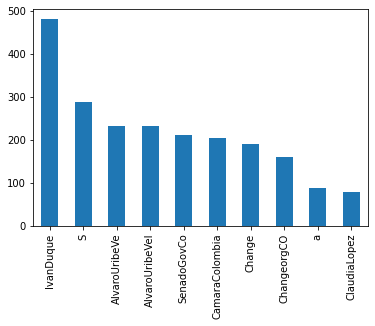

In [76]:
name_counts[0:10].plot.bar()

In [77]:
##Esta función recibe un dataframe y una columna

from string import punctuation
def  clean_text(df, text_field):
  patternURLEMAIL=r'(\w+[.]?\w+@(\w+\.)+\w+)|((http:\/\/www\.|https:\/\/www\.|http:\/\/|https:\/\/)?\w+([\-\.]{1}\w+)*\.[a-z]{2,5}(\/)?(([^\s@])*(\/)?)*)'
  patternHashtagMention=r'(@\w+)|(#\w+)'
  #Primero convertimos a minúscula
  df[text_field] = df[text_field].str.lower()
  # Utilizamos las expresiones regulares anteriores sobre URL, email, hashtag y menciones para quitarlos
  ##SUSTITUIMOS EL PATRÓN DETERMINADO POR UN ESPACIO EN BLANCO. AQUI ELIMINAMOS URL O EMAILS USANDO LA FUNCIÓN SUB
  df[text_field] = df[text_field].apply(lambda elem: re.sub(patternURLEMAIL,'', elem))  
  # Utilizamos una expresión regular para eliminar los hashtag y las menciones con @
  df[text_field] = df[text_field].apply(lambda elem: re.sub(patternHashtagMention,'', elem))
  # Utilizamos una expresión regular también para eliminar los signos de mayor que y menor que
  df[text_field] = df[text_field].apply(lambda elem: re.sub(r'(\&gt\;)|(\&lt\;)','', elem))
  # Utilizamos una expresión regular también para eliminar a.m y p.m cuando mencionan horas
  df[text_field] = df[text_field].apply(lambda elem: re.sub(r'(a\.m)|(p\.m)','', elem))
  # Utilizamos una expresión regular también para eliminar los números O LOS DIGITOS
  df[text_field] = df[text_field].apply(lambda elem: re.sub(r'\d+','', elem))
  df[text_field] = df[text_field].apply(lambda elem: re.sub(r'[|]','', elem))
  ## Sustituir espacios de más
  df[text_field] = df[text_field].apply(lambda elem: re.sub(r'\s+',' ', elem))
  ## Eliminar signos de puntuación '[!#?,.:";]'
  #df[text_field] = df[text_field].apply(lambda elem: re.sub(r"""[‘’]""",' ', elem))
  non_words = list(punctuation) ##LISTA CON SIGNOS DE PUNTUACIÓN
  non_words.extend(['¿', '¡', '‘', '’']) ##EXTENDEMOS LA LISTA ANTERIOR CON OTROS SIGNOS DE PUNTUACIÓN
  df[text_field] = df[text_field].apply(lambda elem: ''.join([c for c in elem if c not in non_words]))
  return df

##Eliminamos las menciones, hashtags y demas

In [78]:
df_clean = clean_text(df.copy(), 'content')
df_clean.head(6)

,Unnamed: 0,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss,mentions,hashtag
0,0,https://twitter.com/WNTERTHK/status/1388282013...,2021-04-30 18:59:59-05:00,no a la reforma tributaria,1388282013984051201,WNTERTHK,[],NaN,[],NaN,[@gcftintokio],"[#P010deEspaldasALaSalud, #ElParoContinua30A, ..."
1,1,https://twitter.com/stillwghosts/status/138828...,2021-04-30 18:59:59-05:00,no a la reforma tributaria,1388282011815665665,stillwghosts,[],NaN,[],NaN,[@JSOOGAG],"[#P010deEspaldasALaSalud, #ElParoContinua30A, ..."
2,2,https://twitter.com/inamdimples/status/1388282...,2021-04-30 18:59:59-05:00,no a la reforma tributaria,1388282011098533888,inamdimples,[],NaN,[],NaN,[@illegirlxtae],"[#P010deEspaldasALaSalud, #ElParoContinua30A, ..."
3,3,https://twitter.com/momofresitaa/status/138828...,2021-04-30 18:59:56-05:00,no a la reforma tributaria,1388281999509626882,momofresitaa,[],NaN,[],NaN,[@roseismylove__],"[#P010deEspaldasALaSalud, #ElParoContinua30A, ..."
4,4,https://twitter.com/_minnieteamo/status/138828...,2021-04-30 18:59:54-05:00,no a la reforma tributaria,1388281989933981703,_minnieteamo,[],NaN,[],NaN,[@iSKZKOUSHI],"[#P010deEspaldasALaSalud, #ElParoContinua30A, ..."
5,5,https://twitter.com/PaolaAndrea2991/status/138...,2021-04-30 18:59:53-05:00,vamos que vamos 🇨🇴🔥💪💪💚no a la reforma tributar...,1388281988147302403,PaolaAndrea2991,[],NaN,[],NaN,[],[]


## StopWords

In [79]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('spanish')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [80]:
df_clean['content'] = df_clean['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df_clean.head()

,Unnamed: 0,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss,mentions,hashtag
0,0,https://twitter.com/WNTERTHK/status/1388282013...,2021-04-30 18:59:59-05:00,reforma tributaria,1388282013984051201,WNTERTHK,[],NaN,[],NaN,[@gcftintokio],"[#P010deEspaldasALaSalud, #ElParoContinua30A, ..."
1,1,https://twitter.com/stillwghosts/status/138828...,2021-04-30 18:59:59-05:00,reforma tributaria,1388282011815665665,stillwghosts,[],NaN,[],NaN,[@JSOOGAG],"[#P010deEspaldasALaSalud, #ElParoContinua30A, ..."
2,2,https://twitter.com/inamdimples/status/1388282...,2021-04-30 18:59:59-05:00,reforma tributaria,1388282011098533888,inamdimples,[],NaN,[],NaN,[@illegirlxtae],"[#P010deEspaldasALaSalud, #ElParoContinua30A, ..."
3,3,https://twitter.com/momofresitaa/status/138828...,2021-04-30 18:59:56-05:00,reforma tributaria,1388281999509626882,momofresitaa,[],NaN,[],NaN,[@roseismylove__],"[#P010deEspaldasALaSalud, #ElParoContinua30A, ..."
4,4,https://twitter.com/_minnieteamo/status/138828...,2021-04-30 18:59:54-05:00,reforma tributaria,1388281989933981703,_minnieteamo,[],NaN,[],NaN,[@iSKZKOUSHI],"[#P010deEspaldasALaSalud, #ElParoContinua30A, ..."


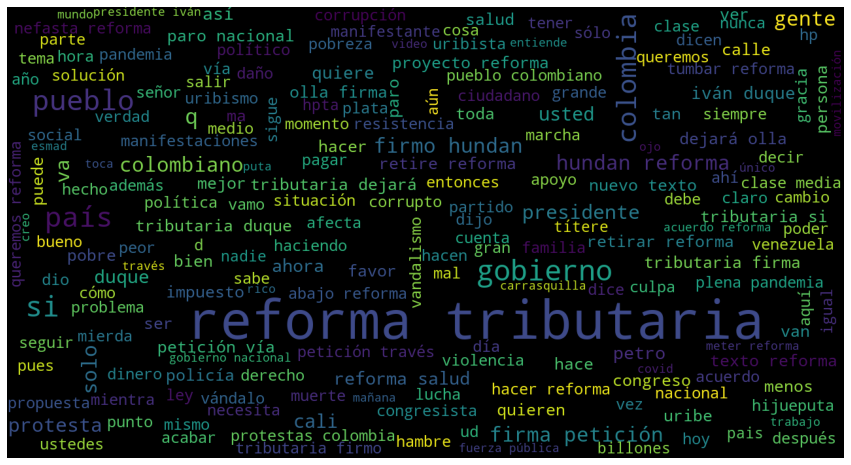

In [82]:
##NUBE DE PALABRAS DESPUES DE ELIMINAR LAS QUE NO QUEREMOS
text = ' '.join(txt for txt in df_clean.content)
wordcloud = WordCloud(width=1280, height=690).generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud) 
plt.axis("off")
plt.show()

##ELIMINANDO EMOJIS

In [83]:
!pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 197 kB 2.6 MB/s 
  Created wheel for emoji: filename=emoji-2.0.0-py3-none-any.whl size=193022 sha256=74efd838b5adef1a8b204e0eb859f4523c3e950f928c817144fdbfd96b3a1dbd
  Stored in directory: /root/.cache/pip/wheels/ec/29/4d/3cfe7452ac7d8d83b1930f8a6205c3c9649b24e80f9029fc38
Successfully built emoji


In [84]:
import emoji

In [85]:
def remove_emoji(text):
  return emoji.replace_emoji(text,'')

In [86]:
def replace_emojis(text):
  return emoji.demojize(text,language='es')

In [87]:
df_clean['tweet']=df_clean['content'].apply(lambda text: remove_emoji(text))
df_clean['tweet']=df_clean['tweet'].apply(lambda elem: re.sub(r'\s+',' ', elem))
df_clean['tweet']=df_clean['tweet'].apply(lambda elem: re.sub(r'^\s+|\s+$','', elem))

In [88]:
df_clean['tweet_wE']=df_clean['content'].apply(lambda text: replace_emojis(text))

In [90]:
df_clean[['content','tweet','tweet_wE']].head(10)

,content,tweet,tweet_wE
0,reforma tributaria,reforma tributaria,reforma tributaria
1,reforma tributaria,reforma tributaria,reforma tributaria
2,reforma tributaria,reforma tributaria,reforma tributaria
3,reforma tributaria,reforma tributaria,reforma tributaria
4,reforma tributaria,reforma tributaria,reforma tributaria
5,vamos vamos 🇨🇴🔥💪💪💚no reforma tributaria 💪,vamos vamos no reforma tributaria,vamos vamos :bandera_colombia::fuego::bíceps_f...
6,reforma tributaria,reforma tributaria,reforma tributaria
7,reforma tributaria ⚠️‼,reforma tributaria,reforma tributaria :advertencia::exclamación_d...
8,cierto vandalos libres cd reforma tributaria,cierto vandalos libres cd reforma tributaria,cierto vandalos libres cd reforma tributaria
9,tumbar reforma tributaria negociar lideres par...,tumbar reforma tributaria negociar lideres par...,tumbar reforma tributaria negociar lideres par...


In [91]:
df_clean['username']

0            WNTERTHK
1        stillwghosts
2         inamdimples
3        momofresitaa
4        _minnieteamo
            ...      
4995     Rvelasco1959
4996        94_nathia
4997      AABenedetti
4998    Jhoansalvarez
4999          Nanfild
Name: username, Length: 5000, dtype: object

## Tokenización

In [92]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [93]:
df_clean['tokens'] = df_clean['tweet'].apply(lambda x: word_tokenize(x))
df_clean.head()

,Unnamed: 0,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss,mentions,hashtag,tweet,tweet_wE,tokens
0,0,https://twitter.com/WNTERTHK/status/1388282013...,2021-04-30 18:59:59-05:00,reforma tributaria,1388282013984051201,WNTERTHK,[],NaN,[],NaN,[@gcftintokio],"[#P010deEspaldasALaSalud, #ElParoContinua30A, ...",reforma tributaria,reforma tributaria,"[reforma, tributaria]"
1,1,https://twitter.com/stillwghosts/status/138828...,2021-04-30 18:59:59-05:00,reforma tributaria,1388282011815665665,stillwghosts,[],NaN,[],NaN,[@JSOOGAG],"[#P010deEspaldasALaSalud, #ElParoContinua30A, ...",reforma tributaria,reforma tributaria,"[reforma, tributaria]"
2,2,https://twitter.com/inamdimples/status/1388282...,2021-04-30 18:59:59-05:00,reforma tributaria,1388282011098533888,inamdimples,[],NaN,[],NaN,[@illegirlxtae],"[#P010deEspaldasALaSalud, #ElParoContinua30A, ...",reforma tributaria,reforma tributaria,"[reforma, tributaria]"
3,3,https://twitter.com/momofresitaa/status/138828...,2021-04-30 18:59:56-05:00,reforma tributaria,1388281999509626882,momofresitaa,[],NaN,[],NaN,[@roseismylove__],"[#P010deEspaldasALaSalud, #ElParoContinua30A, ...",reforma tributaria,reforma tributaria,"[reforma, tributaria]"
4,4,https://twitter.com/_minnieteamo/status/138828...,2021-04-30 18:59:54-05:00,reforma tributaria,1388281989933981703,_minnieteamo,[],NaN,[],NaN,[@iSKZKOUSHI],"[#P010deEspaldasALaSalud, #ElParoContinua30A, ...",reforma tributaria,reforma tributaria,"[reforma, tributaria]"


In [94]:
##QUITAMOS PALABRAS CON LETRAS MENORES QUE 1 PALABRA
df_clean['tokens_clean']=df_clean['tokens']
df_clean['tokens_clean']=df_clean['tokens_clean'].apply(lambda text: [word for word in text if word.isalnum() and len(word)>1])

In [95]:
import itertools
import collections

In [97]:
all_words = list(itertools.chain(*df_clean['tokens_clean']))

In [98]:
##CONTAMOS LA CANTIDAD EXACTA QUE APARECE CADA PALABRA
counts_words = collections.Counter(all_words)
mostcommon_words=counts_words.most_common(35)
mostcommon_words

[('reforma', 5357),
 ('tributaria', 4977),
 ('duque', 588),
 ('gobierno', 548),
 ('si', 525),
 ('colombia', 497),
 ('pueblo', 471),
 ('país', 430),
 ('presidente', 310),
 ('paro', 276),
 ('salud', 253),
 ('va', 239),
 ('gente', 216),
 ('solo', 196),
 ('hundan', 196),
 ('firmo', 194),
 ('protestas', 190),
 ('nacional', 189),
 ('petición', 189),
 ('firma', 185),
 ('cali', 183),
 ('usted', 173),
 ('pandemia', 167),
 ('hacer', 166),
 ('vía', 164),
 ('uribe', 164),
 ('así', 157),
 ('quiere', 152),
 ('ahora', 152),
 ('colombianos', 151),
 ('proyecto', 150),
 ('protesta', 148),
 ('ser', 144),
 ('petro', 144),
 ('retirar', 142)]

## Frecuencia de bigramas

In [99]:
from nltk import bigrams
import networkx as nx
from nltk.util import ngrams

In [100]:
text = ' '.join(txt for txt in df_clean.tweet)
text

'reforma tributaria reforma tributaria reforma tributaria reforma tributaria reforma tributaria vamos vamos no reforma tributaria reforma tributaria reforma tributaria cierto vandalos libres cd reforma tributaria tumbar reforma tributaria negociar lideres paro facil reforma tributaria reforma tributaria entienda presidente queremos nuevo texto remos ver reforma tributaria contrario seguira resistencia pueblo si acata pueblo ira aún golpe perfil gubernamental colocando dianas espalda acuerdo reforma tributaria masacre cali parte fuerza pública civiles protestan reforma tributaria duque asesinatos uirbe dio orden mañana tropa ejecutando igual falsos positivos reforma tributaria significa cambiar nombre reforma tributaria ley financiamiento retiren proyecto solo va desatar caos violencia país acaso dolor patria viendo mismos colombianos peleando ley tan injusta reforma tributaria reforma tributaria payaso sustituir opcional caiga reforma tributaria hijueputaaaaaa reforma tributaria cifras

In [101]:
terms_bigram = [list(nltk.bigrams(t)) for t in df_clean.tokens_clean if t!=[]]

In [102]:
bigramsList = list(itertools.chain(*terms_bigram))
bigram_counts = collections.Counter(bigramsList)
bigram_counts.most_common(15)

[(('reforma', 'tributaria'), 4963),
 (('hundan', 'reforma'), 195),
 (('firmo', 'hundan'), 194),
 (('firma', 'petición'), 182),
 (('reforma', 'salud'), 140),
 (('iván', 'duque'), 126),
 (('petición', 'vía'), 108),
 (('retire', 'reforma'), 105),
 (('retirar', 'reforma'), 102),
 (('tributaria', 'firma'), 100),
 (('paro', 'nacional'), 100),
 (('texto', 'reforma'), 96),
 (('tributaria', 'dejará'), 89),
 (('proyecto', 'reforma'), 87),
 (('dejará', 'olla'), 86)]

In [103]:
bigram_df = pd.DataFrame(bigram_counts.most_common(50),columns=['bigram', 'count'])

In [104]:
bigram_df

,bigram,count
0,"(reforma, tributaria)",4963
1,"(hundan, reforma)",195
2,"(firmo, hundan)",194
3,"(firma, petición)",182
4,"(reforma, salud)",140
5,"(iván, duque)",126
6,"(petición, vía)",108
7,"(retire, reforma)",105
8,"(retirar, reforma)",102
9,"(tributaria, firma)",100


In [105]:
d = bigram_df.set_index('bigram').T.to_dict('records')

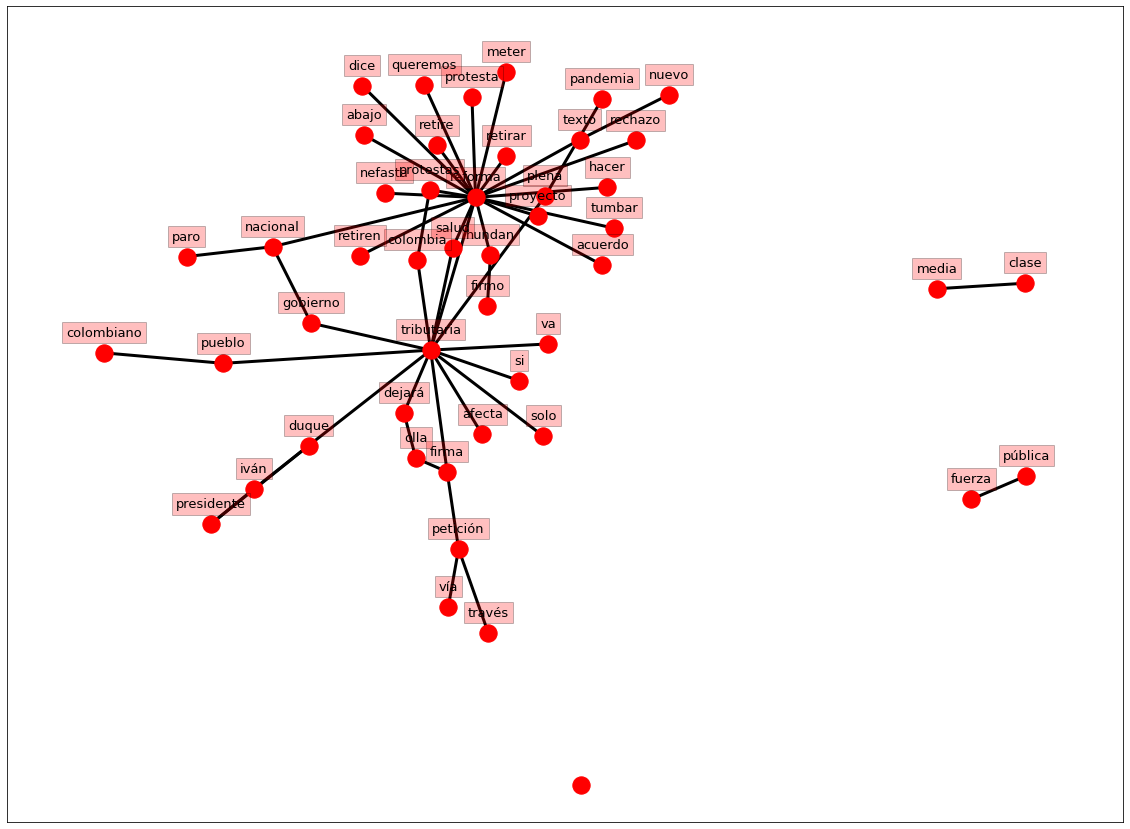

In [106]:
G = nx.Graph()
# Conecciones entre los nodos
for k, v in d[0].items():
  G.add_edge(k[0], k[1], weight=(v * 10))

G.add_node("", weight=100)
fig, ax = plt.subplots(figsize=(20, 15))
pos = nx.spring_layout(G, k=2)
nx.draw_networkx(G, pos,font_size=16,width=3,edge_color='black',node_color='red',with_labels = False,ax=ax)
for key, value in pos.items():
  x, y = value[0], value[1]+.035
  ax.text(x, y, s=key, bbox=dict(facecolor='red', alpha=0.25),horizontalalignment='center', fontsize=13)    
plt.show()

##Lematización (Lemmatization)

In [107]:
import spacy
!python -m spacy download es_core_news_sm # Descarga el modelo del lenguaje

2022-08-06 21:18:48.405251: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.9 MB 3.2 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [108]:
import es_core_news_sm
nlp = es_core_news_sm.load()

In [109]:
print(df_clean.tweet[0])
d=nlp(df_clean.tweet[0])
t=[[tok.text,tok.lemma_,tok.pos_,tok.ent_type_] for tok in d]
t

reforma tributaria


[['reforma', 'reforma', 'NOUN', 'MISC'],
 ['tributaria', 'tributario', 'ADJ', '']]

In [110]:
##Creamos otra columna y llevamos cada palabra original a su lema, o palabra base. Por ejemplo: Hizo --> Hacer
df_clean['lemmas'] = df_clean.tweet.apply(lambda text: [tok.lemma_ for tok in nlp(text)])

In [114]:
df_clean[['tweet','lemmas']].head(20)

,tweet,lemmas
0,reforma tributaria,"[reforma, tributario]"
1,reforma tributaria,"[reforma, tributario]"
2,reforma tributaria,"[reforma, tributario]"
3,reforma tributaria,"[reforma, tributario]"
4,reforma tributaria,"[reforma, tributario]"
5,vamos vamos no reforma tributaria,"[ir, ir, no, reforma, tributario]"
6,reforma tributaria,"[reforma, tributario]"
7,reforma tributaria,"[reforma, tributario]"
8,cierto vandalos libres cd reforma tributaria,"[cierto, vanda él, libre, cd, reforma, tributa..."
9,tumbar reforma tributaria negociar lideres par...,"[tumbar, reforma, tributario, negociar, lider,..."


In [115]:
allWords=[]
for l in df_clean.lemmas:
  allWords.extend(l)
wordDist = nltk.FreqDist(allWords)
wordDist.most_common(15)

[('reforma', 5333),
 ('tributario', 4926),
 ('gobierno', 557),
 ('si', 524),
 ('hacer', 524),
 ('duque', 506),
 ('ir', 471),
 ('colombia', 470),
 ('pueblo', 463),
 ('querer', 455),
 ('país', 439),
 ('decir', 373),
 ('retirar', 362),
 ('presidente', 310),
 ('protesta', 303)]

##Bag of Words

In [116]:
import gensim
from gensim import corpora
import numpy as np

In [117]:
words=[]
for w in df_clean.lemmas:
  words.append(w)

In [118]:
words

[['reforma', 'tributario'],
 ['reforma', 'tributario'],
 ['reforma', 'tributario'],
 ['reforma', 'tributario'],
 ['reforma', 'tributario'],
 ['ir', 'ir', 'no', 'reforma', 'tributario'],
 ['reforma', 'tributario'],
 ['reforma', 'tributario'],
 ['cierto', 'vanda él', 'libre', 'cd', 'reforma', 'tributario'],
 ['tumbar', 'reforma', 'tributario', 'negociar', 'lider', 'paro', 'facil'],
 ['reforma', 'tributario'],
 ['reforma', 'tributario'],
 ['entiendo',
  'presidente',
  'querer',
  'nuevo',
  'texto',
  'rer',
  'ver',
  'reforma',
  'tributario',
  'contrario',
  'seguirar',
  'resistencia',
  'pueblo',
  'si',
  'acatar',
  'pueblo',
  'ira',
  'aún',
  'golpe'],
 ['perfil',
  'gubernamental',
  'colocar',
  'diana',
  'espalda',
  'acuerdo',
  'reforma',
  'tributario'],
 ['masacre',
  'cali',
  'parte',
  'fuerza',
  'público',
  'civil',
  'protestar',
  'reforma',
  'tributario',
  'duque',
  'asesinatos',
  'uirbe',
  'dar',
  'orden',
  'mañana',
  'tropa',
  'ejecutar',
  'igual',

In [119]:
dic=corpora.Dictionary(words)

In [120]:
bow_corpus = [dic.doc2bow(w) for w in words]

In [121]:
lda_model = gensim.models.LdaMulticore(bow_corpus,num_topics = 4, id2word = dic, passes = 20)
lda_model.show_topics()

[(0,
  '0.090*"reforma" + 0.084*"tributario" + 0.017*"duque" + 0.010*"colombia" + 0.009*"retirar" + 0.009*"si" + 0.007*"presidente" + 0.007*"protesta" + 0.007*"ir" + 0.006*"paro"'),
 (1,
  '0.060*"reforma" + 0.056*"tributario" + 0.013*"gobierno" + 0.012*"q" + 0.012*"hacer" + 0.011*"país" + 0.009*"si" + 0.009*"pueblo" + 0.008*"ir" + 0.007*"decir"'),
 (2,
  '0.072*"reforma" + 0.064*"tributario" + 0.031*"firmo" + 0.022*"hundar" + 0.021*"petición" + 0.018*"vía" + 0.013*"dejar" + 0.011*"firma" + 0.010*"olla" + 0.008*"través"'),
 (3,
  '0.066*"reforma" + 0.059*"tributario" + 0.018*"querer" + 0.011*"gobierno" + 0.009*"ir" + 0.008*"si" + 0.007*"poder" + 0.006*"gente" + 0.006*"ser" + 0.006*"hacer"')]

In [122]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 4.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=5cc32739ca47521f52586a012e15cb745f37fd3e3764ff65a066a62ab857fcde
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [123]:
import pyLDAvis.gensim_models

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [124]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dic)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.039500  0.115430       1        1  34.173593
3     -0.077335 -0.044941       2        1  26.867573
1     -0.055476 -0.058081       3        1  26.532639
2      0.172311 -0.012408       4        1  12.426195, topic_info=         Term        Freq       Total Category  logprob  loglift
473     firmo  244.000000  244.000000  Default  30.0000  30.0000
474    hundar  169.000000  169.000000  Default  29.0000  29.0000
475  petición  162.000000  162.000000  Default  28.0000  28.0000
22     querer  409.000000  409.000000  Default  27.0000  27.0000
277       vía  142.000000  142.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
243    social   19.115811  141.174662   Topic4  -6.0092   0.0859
596      hora   15.906508   49.670380   Topic4  -6.1930   0.9467
396    quitar   16.276454   84.462740   Topic4  -6.1700   0.4388
80   gobierno   16.959094  497.278182   Topic4  -6.1290  -1.2930
171     medio   15.909321  175.730104   Topic4  -6.1929  -0.3167

[306 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
1175      1  0.914912  abajo
1175      2  0.077865  abajo
1175      3  0.019466  abajo
414       3  0.834192  abuso
414       4  0.148963  abuso
...     ...       ...    ...
134       3  0.771821      “
134       4  0.130817      “
135       1  0.095077      ”
135       3  0.747036      ”
135       4  0.149407      ”

[463 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 2, 3])